In [1]:
% matplotlib inline
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
env = gym.make('NChain-v0')

[2017-02-06 16:34:57,682] Making new env: NChain-v0


In [23]:
T = 20
S = 20
I = 200
alpha = 0.5

In [24]:
def actionSelection(policy,state):
    return np.random.choice(env.action_space.n,p=policy[state])

    # return np.random.choice(sum(np.argwhere(policy[state] == np.max(policy[state])).tolist(),[]))

In [25]:
def rollout_trajectory(policy):
    
    states = np.zeros(T+1, dtype=int)
    actions = np.zeros(T, dtype=int)
    rewards = np.zeros(T)

    states[0] = env.reset()

    for t in range(T):

        actions[t] = actionSelection(policy,states[t])

        states[t+1], rewards[t], _, _ = env.step(actions[t])
    
    return states, actions, rewards

In [29]:
episodeRewards = []
Q = np.zeros((env.n,env.action_space.n))
policy = np.ones((env.n, env.action_space.n)) / env.action_space.n

learned = False
learnedAt = None

for i in range(I):
    
    episodeReward = 0
    Qnew = np.zeros((env.n,env.action_space.n))
        
    for s in range(S):

        states, actions, rewards = rollout_trajectory(policy)

        for t in range(len(states)-1):
            Qnew[states[t],actions[t]]+= sum(rewards)
        
        episodeReward += sum(rewards)
    
    # Normalize Qnew (Numberically Stable)
    Qnew = Qnew / ( Qnew.sum(axis=1)[:,None] + + 1e-100)

    # Update Q
    Q = (1-alpha) * Q + alpha * Qnew
    
    # Normalize Q
    Q = Q / Q.sum(axis=1)[:,None]
    
    # Calculate Policy
    policy = Q
    
    if(not learned and min(policy[:,0]) > 0.8 ):
        learned = True
        learnedAt = i
    
    episodeRewards.append(episodeReward)

In [30]:
print(policy)

[[  1.00000000e+00   2.39844209e-22]
 [  1.00000000e+00   2.00098451e-31]
 [  1.00000000e+00   4.72931973e-46]
 [  1.00000000e+00   3.12664332e-58]
 [  1.00000000e+00   1.83102682e-51]]


Total Reward per Trajectory : 56.8435


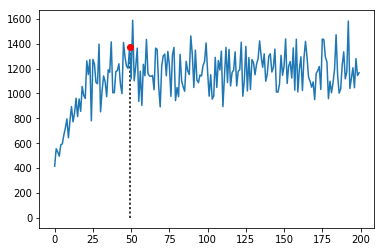

In [31]:
plt.plot(episodeRewards)

if learned:
    plt.plot([learnedAt],[episodeRewards[learnedAt]],'or',lw=5)
    plt.vlines(learnedAt,0,episodeRewards[learnedAt],linestyle='dotted')

print("Total Reward per Trajectory : {}".format(sum(episodeRewards) / (I*S)))